## This is the Sentiment Analysis for Amazon Reviews of the products listed on Amazon. The reviews are entered by actual customers. The review has attributes like stars, the actual text entered, we are generating Sentiment Polarity Score basis the data.

In [3]:
#### Loading all the required libraries here
from lxml import html  
import requests
import pandas as pd
from nltk.corpus import stopwords
from textblob import TextBlob
import matplotlib.pyplot as plt

amazon_url = 'https://www.amazon.co.uk/Hive-Heating-Thermostat-Professional-Installation/product-reviews/B011B3J6KY/ref=cm_cr_othr_d_show_all?ie=UTF8&reviewerType=all_reviews&pageNumber='
user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/62.0.3202.94 Safari/537.36'

headers = {'User-Agent': user_agent}
page = requests.get(amazon_url, headers = headers)
parser = html.fromstring(page.content)

In [9]:
import sys
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
# import utilities
# import scikitplot as skplt
import nltk

#### Download all the stopwords package here

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mnds\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [11]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mnds\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mnds\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
xpath_reviews = '//div[@data-hook="review"]'
reviews = parser.xpath(xpath_reviews)

In [14]:
xpath_rating  = './/i[@data-hook="review-star-rating"]//text()' 
xpath_title   = './/a[@data-hook="review-title"]//text()'
xpath_author  = './/a[@data-hook="review-author"]//text()'
xpath_date    = './/span[@data-hook="review-date"]//text()'
xpath_body    = './/span[@data-hook="review-body"]//text()'
xpath_helpful = './/span[@data-hook="helpful-vote-statement"]//text()'

In [15]:
# Create a dataframe here. 

reviews_df = pd.DataFrame()
for review in reviews:
    rating  = review.xpath(xpath_rating)
    title   = review.xpath(xpath_title)
    author  = review.xpath(xpath_author)
    date    = review.xpath(xpath_date)
    body    = review.xpath(xpath_body)
    helpful = review.xpath(xpath_helpful)

    review_dict = {'rating': rating,
                   'title': title,
                   'author': author,             
                   'date': date,
                   'body': body,
                   'helpful': helpful}
    reviews_df = reviews_df.append(review_dict, ignore_index=True)

In [16]:
all_reviews = pd.DataFrame()

In [17]:
# Fill the values of the reviews here. . 

for i in range(1,90):
    amazon_url = 'https://www.amazon.co.uk/Hive-Heating-Thermostat-Professional-Installation/product-reviews/B011B3J6KY/ref=cm_cr_othr_d_show_all?ie=UTF8&reviewerType=all_reviews&pageNumber='+str(i)
    headers = {'User-Agent': user_agent}
    page = requests.get(amazon_url, headers = headers)
    parser = html.fromstring(page.content)
    xpath_reviews = '//div[@data-hook="review"]'
    reviews = parser.xpath(xpath_reviews)
    reviews_df = pd.DataFrame()
    xpath_rating  = './/i[@data-hook="review-star-rating"]//text()' 
    xpath_title   = './/a[@data-hook="review-title"]//text()'
    xpath_author  = './/a[@data-hook="review-author"]//text()'
    xpath_date    = './/span[@data-hook="review-date"]//text()'
    xpath_body    = './/span[@data-hook="review-body"]//text()'
    xpath_helpful = './/span[@data-hook="helpful-vote-statement"]//text()'
    #print(i)
    for review in reviews:
        rating  = review.xpath(xpath_rating)
        title   = review.xpath(xpath_title)
        author  = review.xpath(xpath_author)
        date    = review.xpath(xpath_date)
        body    = review.xpath(xpath_body)
        helpful = review.xpath(xpath_helpful)

        review_dict = {'rating': rating,
                       'title': title,
                       'author': author,             
                       'date': date,
                       'body': body,
                       'helpful': helpful}
        reviews_df = reviews_df.append(review_dict, ignore_index=True)
    #print(reviews_df)
    all_reviews = all_reviews.append(reviews_df)
    


In [18]:
all_reviews.head()

,author,body,date,helpful,rating,title
0,[],"[I paid for the BritishGas install, the engine...",[8 October 2018],[210 people found this helpful],[2.0 out of 5 stars],"[BritishGas installation was a joke, buy it wi..."
1,[],[I haven't had this installed yet - two week w...,[29 September 2018],[85 people found this helpful],[4.0 out of 5 stars],[PLEASE READ THIS IF YOU BUY WITH INSTALLATION...
2,[],"[Great product, replaced a very old 80's slide...",[16 January 2018],[161 people found this helpful],[5.0 out of 5 stars],"[Really useful, and sort of cool!]"
3,[],"[I was a bit apprehensive buying this, in case...",[1 October 2018],[42 people found this helpful],[5.0 out of 5 stars],"[Simple to install and use, great tech]"
4,[],[I bought this item from Amazon Marketplace - ...,[23 October 2018],[33 people found this helpful],[1.0 out of 5 stars],[Warning if buying used off Amazon Marketplace...


#### Define a path here

In [19]:
out_folder = 'C:/Users/mnds/PythonFiles/'

#### Save the reviews locally

In [20]:
all_reviews.to_csv(out_folder + 'Reviews.csv')

#### Load the data and start the analysis

In [21]:
#Load the data now and analyse it
data_path = 'C:/Users/mnds/PythonFiles/'
reviewDataCSV = 'Reviews.csv'
reviewData = (pd.read_csv(data_path+reviewDataCSV,index_col=0,))

In [22]:
reviewData.shape

(712, 6)

In [23]:
reviewData.rating.unique()

array(["['2.0 out of 5 stars']", "['4.0 out of 5 stars']",
       "['5.0 out of 5 stars']", "['1.0 out of 5 stars']",
       "['3.0 out of 5 stars']"], dtype=object)

In [24]:
reviewData.rating.value_counts()

['5.0 out of 5 stars']    548
['4.0 out of 5 stars']     61
['1.0 out of 5 stars']     60
['3.0 out of 5 stars']     26
['2.0 out of 5 stars']     17
Name: rating, dtype: int64

In [25]:
reviewData.rating.value_counts()[1]

61

In [26]:
reviewData.rating.unique()[0]

"['2.0 out of 5 stars']"

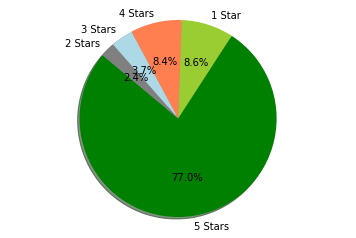

In [27]:

labels = '5 Stars', '1 Star', '4 Stars', '3 Stars', '2 Stars'
sizes = [reviewData.rating.value_counts()[0], reviewData.rating.value_counts()[1],reviewData.rating.value_counts()[2],reviewData.rating.value_counts()[3],reviewData.rating.value_counts()[4]]
colors = ['green', 'yellowgreen', 'coral', 'lightblue', 'grey']
explode = (0, 0, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [28]:
reviewData.body.head()

0    ['I paid for the BritishGas install, the engin...
1    ["I haven't had this installed yet - two week ...
2    ["Great product, replaced a very old 80's slid...
3    ['I was a bit apprehensive buying this, in cas...
4    ['I bought this item from Amazon Marketplace -...
Name: body, dtype: object

In [29]:
# the latest review
max(reviewData.date)

"['9 September 2018']"

In [30]:
# the oldest review
min(reviewData.date)

"['1 April 2016']"

## The Text Analytics Starts

##### Calculate the number of words in each review

In [31]:
reviewsBodyWordCount = reviewData.body.apply(lambda x: len(str(x).split(" ")))

In [32]:
reviewsBodyWordCount.sort_values(ascending= False)

0    817
4    803
7    710
7    520
5    431
2    367
6    365
7    357
5    355
0    355
6    353
3    350
0    346
3    338
0    320
0    298
3    297
1    295
4    287
0    279
3    269
3    264
1    254
4    244
1    238
6    228
5    205
2    204
7    202
3    201
    ... 
2      3
1      3
2      3
6      3
3      3
3      2
3      2
2      2
6      2
0      2
5      2
6      2
2      2
2      2
7      2
7      2
0      2
0      2
0      2
3      2
4      1
4      1
1      1
0      1
5      1
1      1
5      1
7      1
0      1
2      1
Name: body, Length: 712, dtype: int64

In [33]:
reviewsBodyWordCount.nlargest(n=5, keep='first')

0    817
4    803
7    710
7    520
5    431
Name: body, dtype: int64

In [34]:
reviewsBodyWordCount.nsmallest(n=5, keep='first')

1    1
4    1
2    1
0    1
5    1
Name: body, dtype: int64

##### Calculate the number of characters in each review

In [35]:
reviewsBodyCharCount = reviewData.body.str.len() ## this also includes spaces

In [36]:
reviewsBodyCharCount.nlargest(n=5, keep='first')

0    4524
4    4289
7    3815
7    2817
5    2450
Name: body, dtype: int64

In [37]:
reviewsBodyCharCount.nsmallest(n=5, keep='first')

0    6
1    7
1    8
5    8
5    8
Name: body, dtype: int64

## Pre-processing starts

#### Convert all the words to lower case

In [38]:
type(reviewData.body.str)

pandas.core.strings.StringMethods

In [39]:
reviewData.head()

,author,body,date,helpful,rating,title
0,[],"['I paid for the BritishGas install, the engin...",['8 October 2018'],['210 people found this helpful'],['2.0 out of 5 stars'],"['BritishGas installation was a joke, buy it w..."
1,[],"[""I haven't had this installed yet - two week ...",['29 September 2018'],['85 people found this helpful'],['4.0 out of 5 stars'],['PLEASE READ THIS IF YOU BUY WITH INSTALLATIO...
2,[],"[""Great product, replaced a very old 80's slid...",['16 January 2018'],['161 people found this helpful'],['5.0 out of 5 stars'],"['Really useful, and sort of cool!']"
3,[],"['I was a bit apprehensive buying this, in cas...",['1 October 2018'],['42 people found this helpful'],['5.0 out of 5 stars'],"['Simple to install and use, great tech']"
4,[],['I bought this item from Amazon Marketplace -...,['23 October 2018'],['33 people found this helpful'],['1.0 out of 5 stars'],"[""Warning if buying used off Amazon Marketplac..."


In [40]:
reviewData.body = reviewData.body.str.lower()

In [41]:
# all the body reviews are converted to lowercase
reviewData.head()

,author,body,date,helpful,rating,title
0,[],"['i paid for the britishgas install, the engin...",['8 October 2018'],['210 people found this helpful'],['2.0 out of 5 stars'],"['BritishGas installation was a joke, buy it w..."
1,[],"[""i haven't had this installed yet - two week ...",['29 September 2018'],['85 people found this helpful'],['4.0 out of 5 stars'],['PLEASE READ THIS IF YOU BUY WITH INSTALLATIO...
2,[],"[""great product, replaced a very old 80's slid...",['16 January 2018'],['161 people found this helpful'],['5.0 out of 5 stars'],"['Really useful, and sort of cool!']"
3,[],"['i was a bit apprehensive buying this, in cas...",['1 October 2018'],['42 people found this helpful'],['5.0 out of 5 stars'],"['Simple to install and use, great tech']"
4,[],['i bought this item from amazon marketplace -...,['23 October 2018'],['33 people found this helpful'],['1.0 out of 5 stars'],"[""Warning if buying used off Amazon Marketplac..."


#### Remove the punctuations

In [42]:
reviewData.body = reviewData.body.str.replace('[^\w\s]','')

#### Remove the Stop Words, which are the commonly occuring words like the, a, an, is etc.

In [43]:
stop = stopwords.words('english')

In [44]:
reviewData.body = reviewData.body.apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [45]:
reviewData.body.head()

0    paid britishgas install engineer turned made n...
1    havent installed yet two week wait engineer re...
2    great product replaced old 80s slide timer clo...
3    bit apprehensive buying case wiring hassle wor...
4    bought item amazon marketplace normally good w...
Name: body, dtype: object

##### These are the most comonly occuring words in our corpus. Depending on the requirement, we may remove or keep them. We are removing them here

In [46]:
freq = pd.Series(' '.join(reviewData.body).split()).value_counts()[:20]

In [47]:
freq

heating         388
hive            345
easy            295
thermostat      247
great           194
use             188
install         173
installation    172
product         169
control         169
system          163
boiler          160
gas             154
set             150
app             147
home            147
works           140
british         136
one             134
good            129
dtype: int64

In [48]:
freq = list(freq.index)
reviewData.body = reviewData.body.apply(lambda x: " ".join(x for x in x.split() if x not in freq))

In [49]:
reviewData.body.head()

0    paid britishgas engineer turned made noises lo...
1    havent installed yet two week wait engineer re...
2    replaced old 80s slide timer clock gravity fed...
3    bit apprehensive buying case wiring hassle wor...
4    bought item amazon marketplace normally way sa...
Name: body, dtype: object

##### Lets see which are the rare words, we are removing them

In [50]:
freq = pd.Series(' '.join(reviewData.body).split()).value_counts()[-10:]

In [51]:
freq

explains     1
hands        1
simplest     1
tied         1
smarthome    1
eavh         1
addworks     1
angle        1
final        1
theyd        1
dtype: int64

In [52]:
freq = list(freq.index)
reviewData.body = reviewData.body.apply(lambda x: " ".join(x for x in x.split() if x not in freq))

#### Tokentization of reviews

In [53]:
from nltk.tokenize import word_tokenize

In [54]:
tokens = word_tokenize(reviewData.iloc[1,1])
print(tokens)

['havent', 'installed', 'yet', 'two', 'week', 'wait', 'engineer', 'review', 'alert', 'people', 'outofdate', 'information', 'included', 'unit', 'regarding', 'book', 'phone', 'number', 'web', 'address', 'provided', 'mine', 'inaccurate', 'call', 'number', 'given', 'told', 'new', 'number', 'strongly', 'recommend', 'dont', 'automated', 'routing', 'type', 'talk', 'understands', 'little', 'phone', 'came', 'dangerously', 'close', 'encounter', 'wall', 'web', 'address', 'given', 'replace', 'shopinstore', 'without', 'quote', 'marks', 'course', 'expect', 'shall', 'revise', 'rating', 'unit', 'running', 'thought', 'information', 'might', 'helpful', 'prospective', 'buyers', 'edit', 'sometime', 'later', 'im', 'happy', 'performance', 'programme', 'integration', 'alexa', 'straightforward', 'unless', 'like', 'want', 'able', 'setchange', 'hot', 'water', 'via', 'smartthings', 'routines', 'search', 'smartthings', 'instructions', 'code', 'smartthings', 'community', 'havent', 'issues', 'wifi', 'batteries', 's

In [55]:
reviewData.iloc[1,1]

'havent installed yet two week wait engineer review alert people outofdate information included unit regarding book phone number web address provided mine inaccurate call number given told new number strongly recommend dont automated routing type talk understands little phone came dangerously close encounter wall web address given replace shopinstore without quote marks course expect shall revise rating unit running thought information might helpful prospective buyers edit sometime later im happy performance programme integration alexa straightforward unless like want able setchange hot water via smartthings routines search smartthings instructions code smartthings community havent issues wifi batteries still going strong complaint engineer tried baffle science letting leave old place even said situ attempt intimidate cheeky ber soon discovered messing wrong woman didnt even deploy mum death stare soupgraded four stars fifth docked poor booking instructions barefaced effrontery enginee

#### Doing Stemming, currenlty commented since we are preferring Lemit

In [57]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
reviewData.body[:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    paid britishga engin turn made nois look exist...
1    havent instal yet two week wait engin review a...
2    replac old 80 slide timer clock graviti fed st...
3    bit apprehens buy case wire hassl worth look c...
4    bought item amazon marketplac normal way save ...
Name: body, dtype: object

#### Doing Lemmatization

In [58]:
from textblob import Word
reviewData.body = reviewData.body.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
reviewData.body.head()

0    paid britishgas engineer turned made noise loo...
1    havent installed yet two week wait engineer re...
2    replaced old 80 slide timer clock gravity fed ...
3    bit apprehensive buying case wiring hassle wor...
4    bought item amazon marketplace normally way sa...
Name: body, dtype: object

#### Word Cloud function is defined overe here

In [65]:
def generate_wordcloud(text): 
    wordcloud = WordCloud(font_path='C:/Windows/Fonts/Verdana.ttf',
                          relative_scaling = 1.0,
                          stopwords = {'to', 'of'} 
                          ).generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [66]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 

In [67]:
sentimentString = reviewData.iloc[1,1]

In [68]:
# append to this string 
for i in range(2,len(reviewData)):
    sentimentString = sentimentString + reviewData.iloc[i,1]

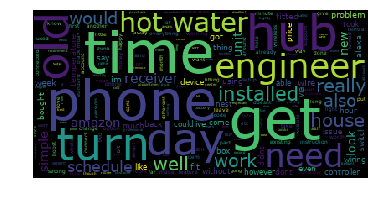

In [69]:
generate_wordcloud(sentimentString)

#### This is the Sentiment Analysis 

In [70]:
# the functions generates polarity and subjectivity here, subsetting the polarity only here
allReviewsSentiment = reviewData.body[:900].apply(lambda x: TextBlob(x).sentiment[0])

In [71]:
# this contains boths subjectivity and polarity
allReviewsSentimentComplete = reviewData.body[:900].apply(lambda x: TextBlob(x).sentiment)

In [72]:
allReviewsSentimentComplete.head()

0    (0.09405753968253966, 0.45099206349206356)
1     (0.07432359307359304, 0.5765151515151515)
2                  (0.3075, 0.5349999999999999)
3    (0.14006238859180034, 0.46327985739750455)
4      (0.0638888888888889, 0.3166666666666667)
Name: body, dtype: object

In [73]:
allReviewsSentiment.to_csv(out_folder + 'ReviewsSentiment.csv')

In [74]:
## get the respective counts for all the reviews
# if the polarity is above 0.75 Very Satisfied
# if the polarity is between 0.5-0.74 Satisfied
# if the polarity is between 0.2-0.5 Nice
# if the polarity is between -0.2 to 0.2 Neutral
# if the polarity is between -0.2 to -0.5 Dissatisfied
# if the polarity is between -0.5 to -0.74 Very Dissatisfied
# if the polarity is less than -0.75 Extremely Dissatisfied


In [75]:
allReviewsSentimentDF = allReviewsSentiment.to_frame()

In [76]:
allReviewsSentimentDF.head()

,body
0,0.094058
1,0.074324
2,0.307500
3,0.140062
4,0.063889


In [77]:
# Create a list to store the data
grades = []

# For each row in the column,
for row in allReviewsSentimentDF['body']:
    # if more than a value,
    if row >= 0.75:
       grades.append('Extremely Satisfied')
    elif (row >= 0.5) & (row < 0.75):
        grades.append('Satisfied')
    elif (row >= 0.2) & (row < 0.5):
        grades.append('Nice')
    elif (row >= -0.2) & (row < 0.2):
        grades.append('Neutral')
    elif (row > -0.5) & (row <= -0.2):
        grades.append('Bad')
    elif (row >= -0.75) & (row < -0.5):
        grades.append('Dis-satisfied')
    elif  row < -0.75:
        grades.append('Extremely Dis-satisfied')
    else:
        # Append a failing grade
        grades.append('No Sentiment')
        
# Create a column from the list
allReviewsSentimentDF['SentimentScore'] = grades

In [78]:
allReviewsSentimentDF.head()

,body,SentimentScore
0,0.094058,Neutral
1,0.074324,Neutral
2,0.307500,Nice
3,0.140062,Neutral
4,0.063889,Neutral


In [79]:
allReviewsSentimentDF.SentimentScore.value_counts()

Neutral                    337
Nice                       256
Satisfied                   62
Extremely Satisfied         37
Bad                         14
Dis-satisfied                3
No Sentiment                 2
Extremely Dis-satisfied      1
Name: SentimentScore, dtype: int64

In [80]:
type(allReviewsSentimentDF.SentimentScore)

pandas.core.series.Series

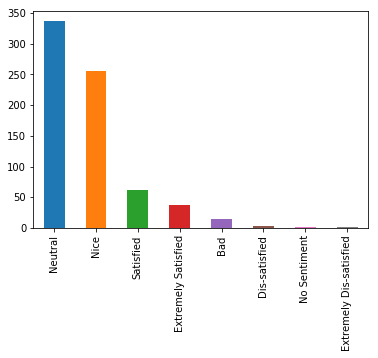

In [81]:
allReviewsSentimentDF['SentimentScore'].value_counts().plot(kind='bar')

In [82]:
reviewData.head()

,author,body,date,helpful,rating,title
0,[],paid britishgas engineer turned made noise loo...,['8 October 2018'],['210 people found this helpful'],['2.0 out of 5 stars'],"['BritishGas installation was a joke, buy it w..."
1,[],havent installed yet two week wait engineer re...,['29 September 2018'],['85 people found this helpful'],['4.0 out of 5 stars'],['PLEASE READ THIS IF YOU BUY WITH INSTALLATIO...
2,[],replaced old 80 slide timer clock gravity fed ...,['16 January 2018'],['161 people found this helpful'],['5.0 out of 5 stars'],"['Really useful, and sort of cool!']"
3,[],bit apprehensive buying case wiring hassle wor...,['1 October 2018'],['42 people found this helpful'],['5.0 out of 5 stars'],"['Simple to install and use, great tech']"
4,[],bought item amazon marketplace normally way sa...,['23 October 2018'],['33 people found this helpful'],['1.0 out of 5 stars'],"[""Warning if buying used off Amazon Marketplac..."


In [83]:
len(reviewData)

712

In [84]:
#### Merge the review data with Sentiment generated

# add column Polarity Score
reviewData['polarityScore'] = allReviewsSentimentDF['body']



In [85]:
reviewData.head()

,author,body,date,helpful,rating,title,polarityScore
0,[],paid britishgas engineer turned made noise loo...,['8 October 2018'],['210 people found this helpful'],['2.0 out of 5 stars'],"['BritishGas installation was a joke, buy it w...",0.094058
1,[],havent installed yet two week wait engineer re...,['29 September 2018'],['85 people found this helpful'],['4.0 out of 5 stars'],['PLEASE READ THIS IF YOU BUY WITH INSTALLATIO...,0.074324
2,[],replaced old 80 slide timer clock gravity fed ...,['16 January 2018'],['161 people found this helpful'],['5.0 out of 5 stars'],"['Really useful, and sort of cool!']",0.307500
3,[],bit apprehensive buying case wiring hassle wor...,['1 October 2018'],['42 people found this helpful'],['5.0 out of 5 stars'],"['Simple to install and use, great tech']",0.140062
4,[],bought item amazon marketplace normally way sa...,['23 October 2018'],['33 people found this helpful'],['1.0 out of 5 stars'],"[""Warning if buying used off Amazon Marketplac...",0.063889


#### Generate the word-cloud for sentiments with bad reviews

In [86]:
negativeReviews = reviewData[reviewData.polarityScore < 0]

In [87]:
negativeReviews.head()

,author,body,date,helpful,rating,title,polarityScore
3,[],contact number website given leaflet longer mu...,['22 October 2018'],['6 people found this helpful'],['1.0 out of 5 stars'],['Poor installation booking service'],-0.066667
6,[],bought sale july knowing itd much easier get i...,['23 July 2017'],['8 people found this helpful'],['5.0 out of 5 stars'],['Easy and quick install - great product'],-0.091667
7,[],little difficulty managed arrange fri 23rd nov...,['23 November 2018'],['5 people found this helpful'],['1.0 out of 5 stars'],['Held To Ransom By Hive'],-0.233796
2,[],review also negative one overall mixed wish ta...,['23 November 2018'],['4 people found this helpful'],['1.0 out of 5 stars'],['Avoid!'],-0.055093
4,[],bought version without professional im diy exp...,['26 November 2018'],['4 people found this helpful'],['5.0 out of 5 stars'],"['Easy to install, easy to use']",-0.082738


In [88]:
negativeString = negativeReviews.iloc[1,1]

In [89]:
# append to this string 
for i in range(2,len(reviewData)):
    negativeString = negativeString + reviewData.iloc[i,1]

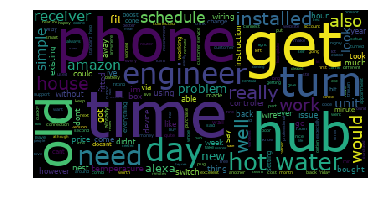

In [90]:
generate_wordcloud(negativeString)